#### Use balance dataset. Create classification model using SVM.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings

%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/rahul96rajan/sample_datasets/master/balance.csv')
data.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       625 non-null    object
 1   L-Weight    625 non-null    int64 
 2   L-Distance  625 non-null    int64 
 3   R-Weight    625 non-null    int64 
 4   R-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [4]:
X = data.drop('Class', axis=1)
y = data['Class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [6]:
X_train.describe()

,L-Weight,L-Distance,R-Weight,R-Distance
count,500.000000,500.000000,500.000000,500.000000
mean,3.010000,3.006000,3.030000,3.044000
std,1.410631,1.420563,1.438485,1.399278
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


<AxesSubplot:xlabel='Class', ylabel='count'>

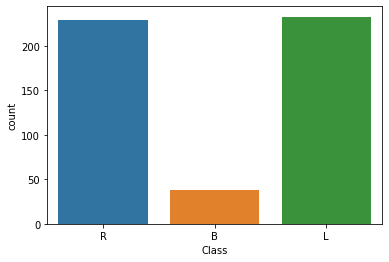

In [7]:
sns.countplot(x = 'Class', data=X_train.join(y_train))

In [8]:
y_train.value_counts()

L    233
R    229
B     38
Name: Class, dtype: int64

In [9]:
svc = SVC(random_state=42)

In [10]:
skf = StratifiedKFold(n_splits=20)

params = dict(kernel = ['linear', 'rbf'], gamma = np.arange(0.5, 5.1, 0.5), 
              C = np.arange(0.5, 5.1, 0.5))

gscv = GridSearchCV(svc, params, scoring='f1_micro', cv=skf, n_jobs=-1)

# Taking weight as MICRO as we observed earlier, data is imbalanced.

In [11]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=None, shuffle=False),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
                         'gamma': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
                         'kernel': ['linear', 'rbf']},
             scoring='f1_micro')

In [12]:
print(gscv.best_estimator_, '\n\n', gscv.best_score_)

SVC(C=0.5, gamma=0.5, kernel='linear', random_state=42) 

 0.9240000000000002


In [13]:
y_pred = gscv.predict(X_test)

print(f1_score(y_test, y_pred, average='micro'))

0.888


In [14]:
y_pred_train = gscv.predict(X_train)
y_pred_test = gscv.predict(X_test)

values = [[y_train, y_pred_train], [y_test, y_pred_test]]

In [15]:
accu_scores = map(lambda x: round(accuracy_score(x[0], x[1]), 2), values)
f1_mic_scores = map(lambda x: round(f1_score(x[0], x[1], average='micro'), 2), values)

In [16]:
metric_df = pd.DataFrame({"Accuracy": accu_scores, "F1 Score (micro)": f1_mic_scores}, index=['Training', 'Testing'])
display(metric_df)

,Accuracy,F1 Score (micro)
Training,0.92,0.92
Testing,0.89,0.89
